In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline
sns.set()
# Lendo os dados de treinamento
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv", delimiter=';')
print("Dados de treinamento lidos com sucesso!")
len(wearable_data.index)
wearable_data.describe()

Dados de treinamento lidos com sucesso!


,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891
std,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036
min,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000
25%,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000
50%,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000
75%,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000
max,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000,-43.000000


In [2]:
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [3]:
wearable_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 19 columns):
user                  165633 non-null object
gender                165633 non-null object
age                   165633 non-null int64
how_tall_in_meters    165633 non-null float64
weight                165633 non-null int64
body_mass_index       165633 non-null float64
x1                    165633 non-null int64
y1                    165633 non-null int64
z1                    165633 non-null int64
x2                    165633 non-null int64
y2                    165633 non-null int64
z2                    165633 non-null int64
x3                    165633 non-null int64
y3                    165633 non-null int64
z3                    165633 non-null int64
x4                    165633 non-null int64
y4                    165633 non-null int64
z4                    165633 non-null int64
class                 165633 non-null object
dtypes: float64(2), int64(14), object(3)
memor

In [4]:
wearable_data.shape

(165633, 19)

* Podemos ver que não há missing values no dataset

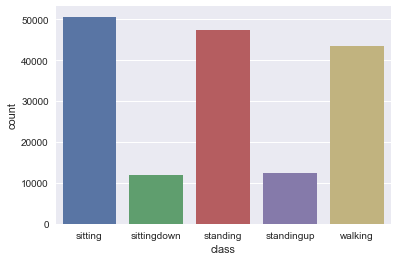

In [6]:
sns.countplot(x='class', data=wearable_data)

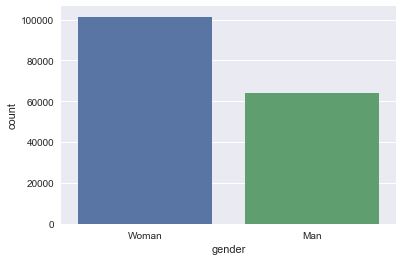

In [7]:
sns.countplot(x='gender', data=wearable_data)

In [48]:
discrete_dat = pd.cut(wearable_data.x1, 10)
type(discrete_dat)

pandas.core.series.Series

In [49]:
df1 = discrete_dat.to_frame()
df1.rename(index=str, columns={"x1": "x1discrim"}, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [50]:
df2=wearable_data.join(df1)

In [51]:
df2.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class,x1discrim
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting,"(-61.5, 20.0]"
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting,"(-61.5, 20.0]"
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting,"(-61.5, 20.0]"
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting,"(-61.5, 20.0]"
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting,"(-61.5, 20.0]"


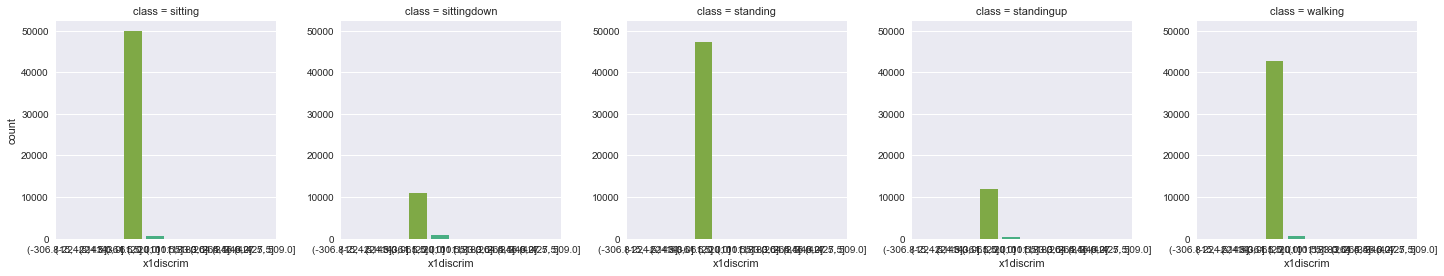

In [52]:
sns.factorplot(x='x1discrim', col='class', kind='count', data=df2)

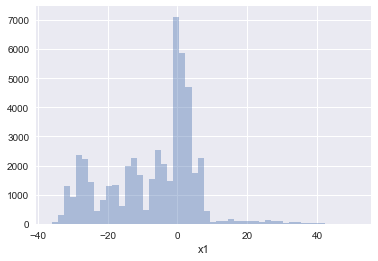

In [59]:
sns.distplot(wearable_data[wearable_data['class']=='sitting']['x1'], kde=False)

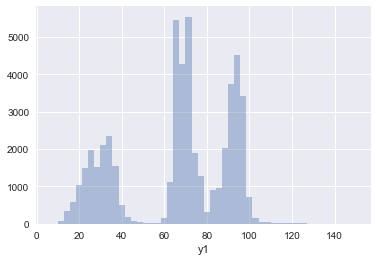

In [64]:
sns.distplot(wearable_data[wearable_data['class']=='sitting']['y1'], kde=False)

In [73]:
classes = wearable_data['class'].unique()
axis = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4']

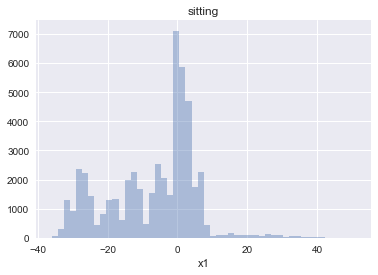

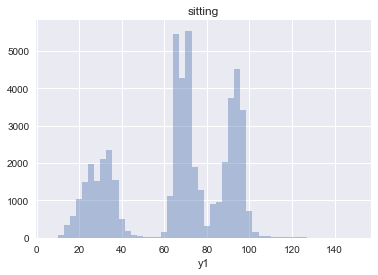

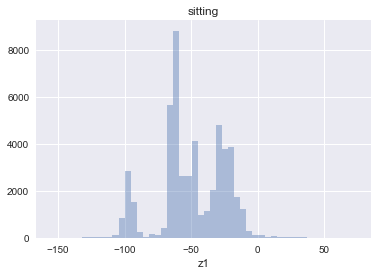

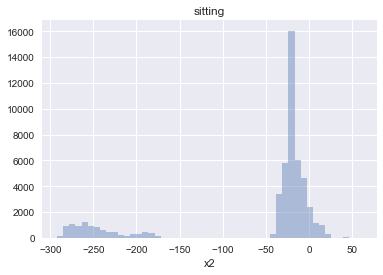

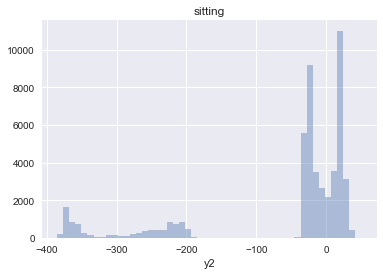

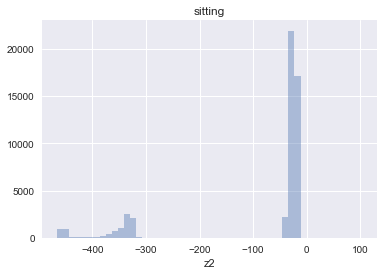

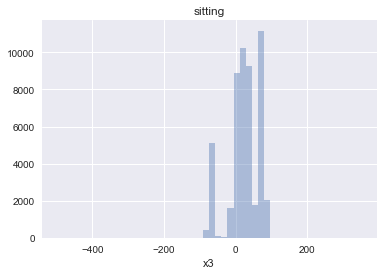

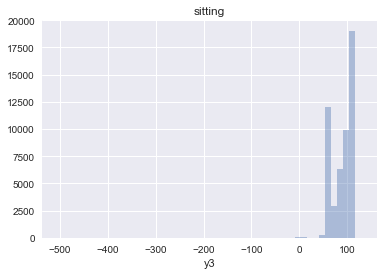

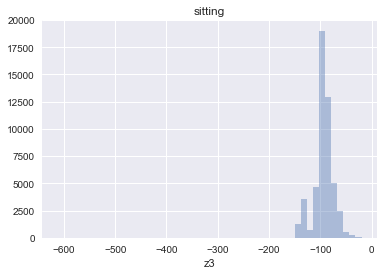

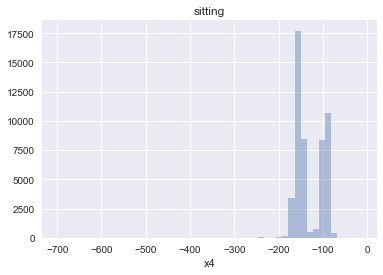

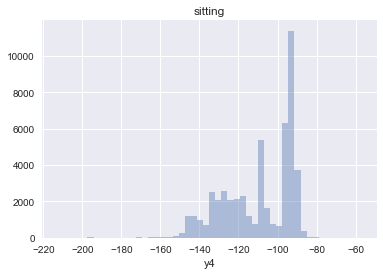

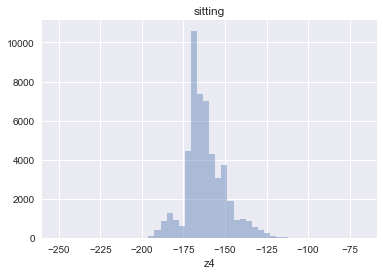

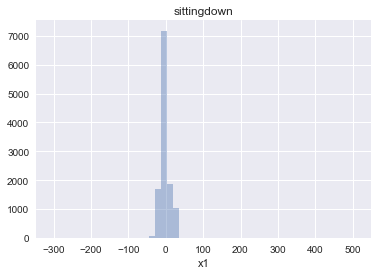

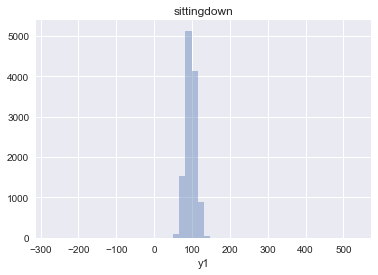

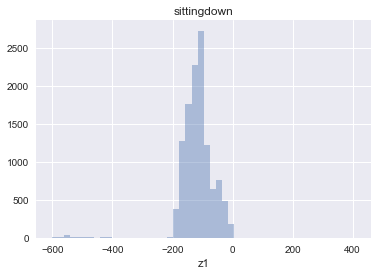

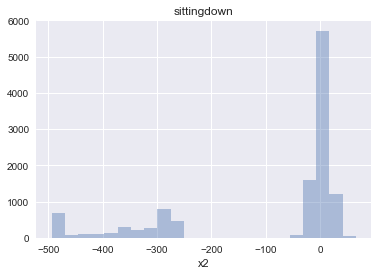

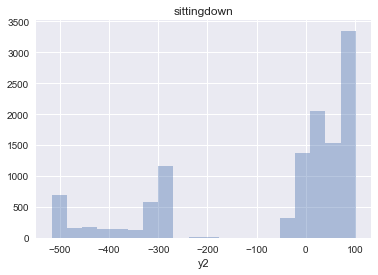

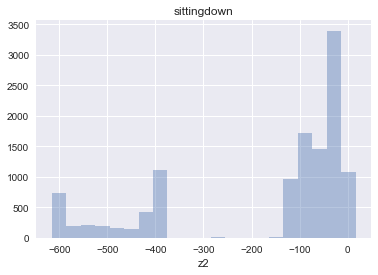

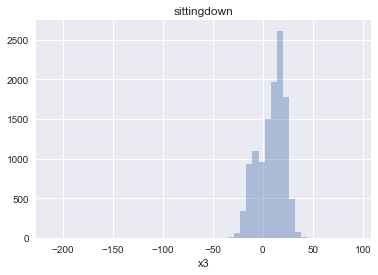

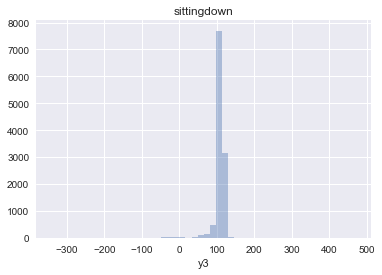

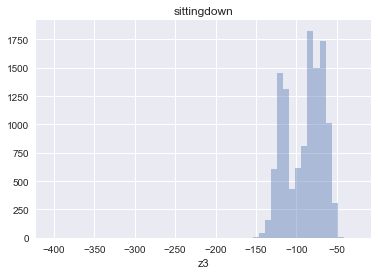

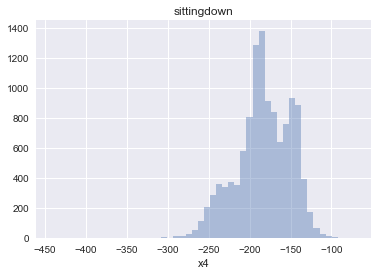

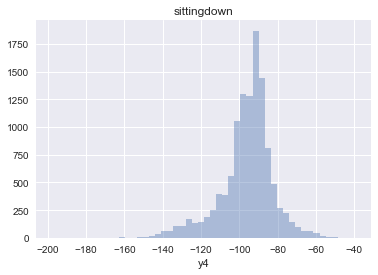

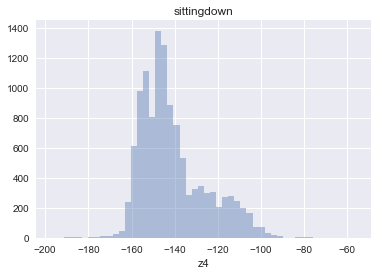

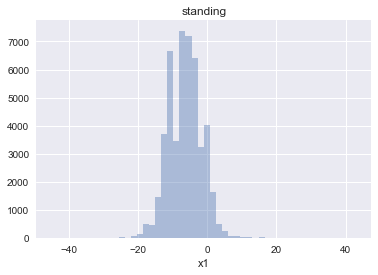

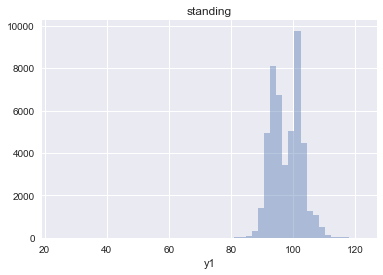

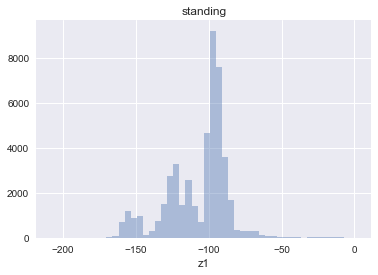

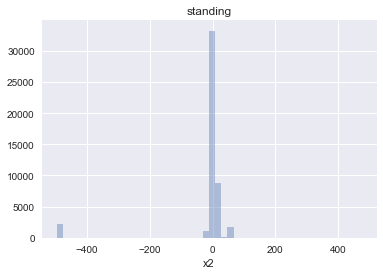

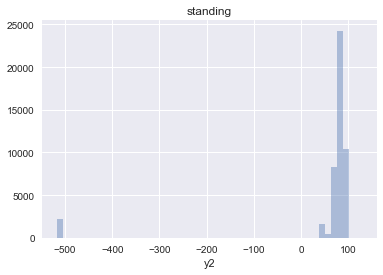

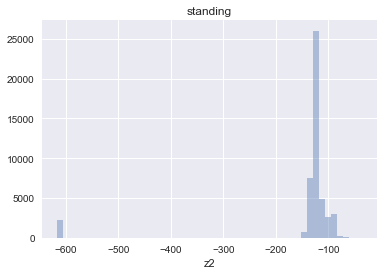

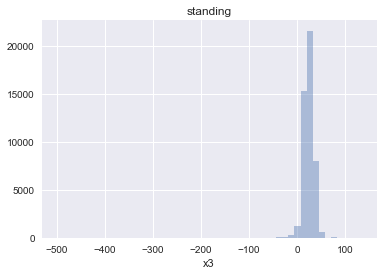

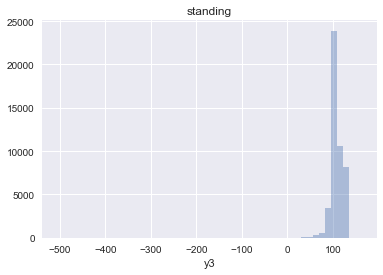

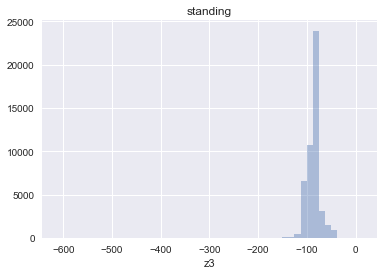

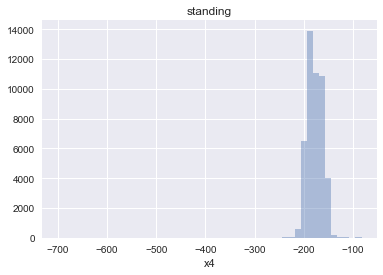

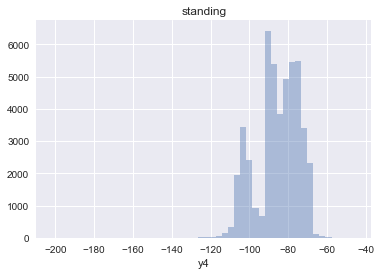

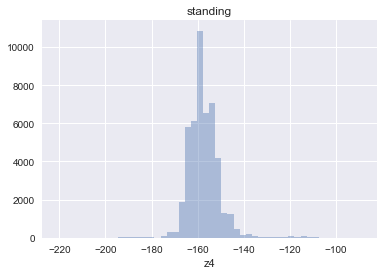

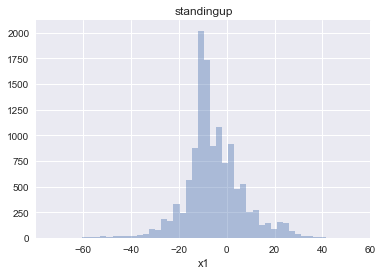

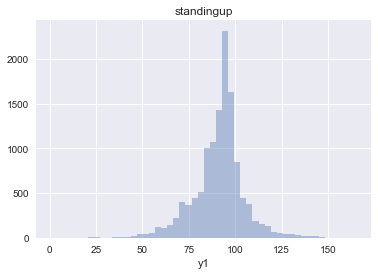

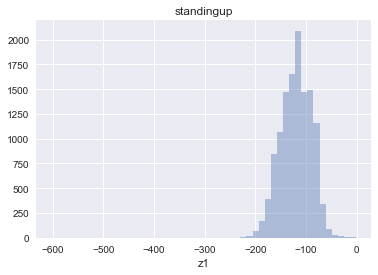

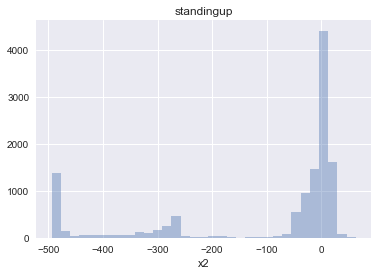

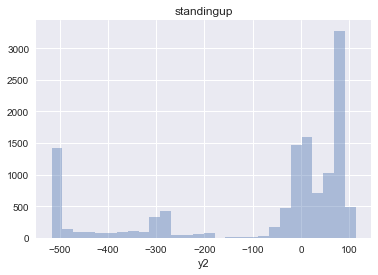

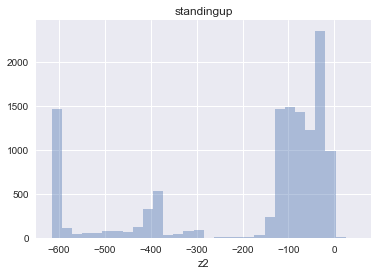

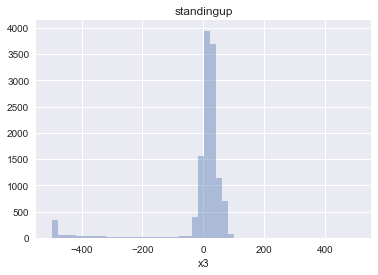

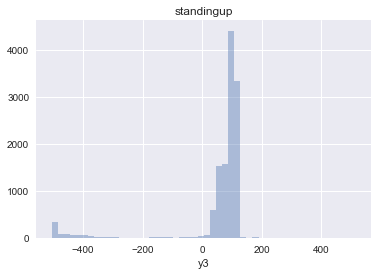

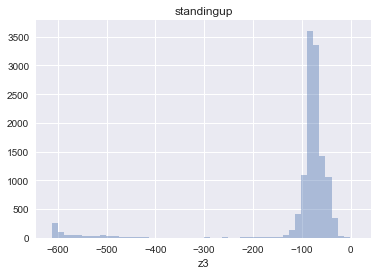

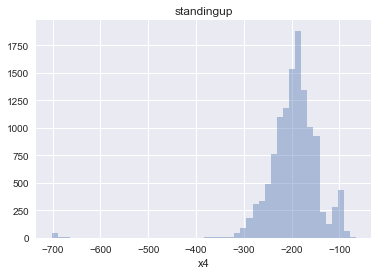

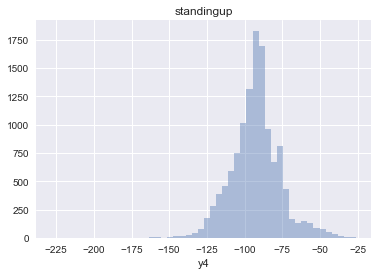

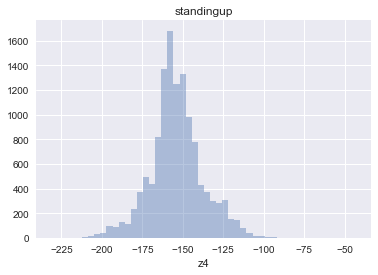

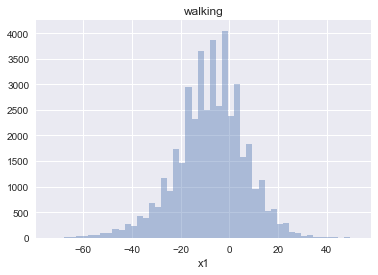

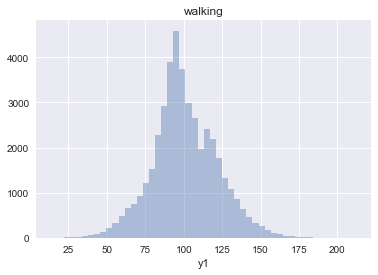

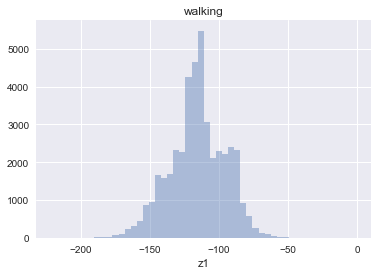

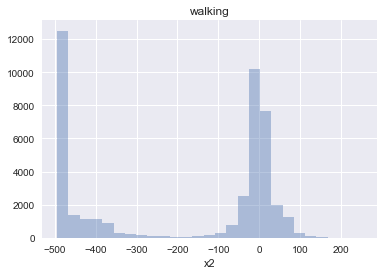

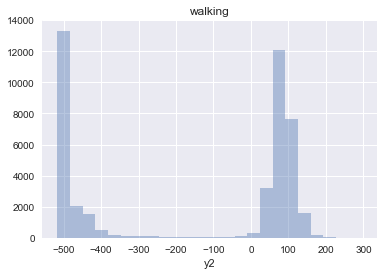

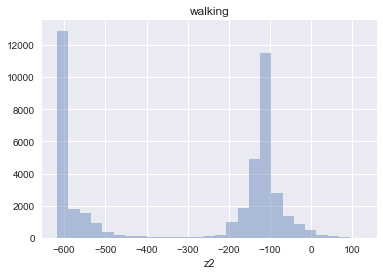

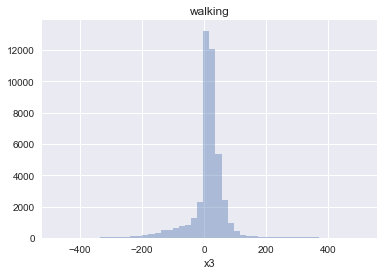

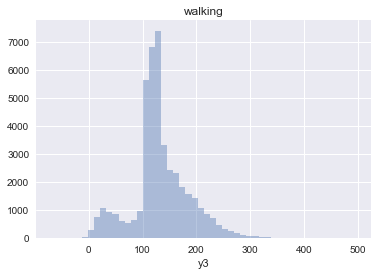

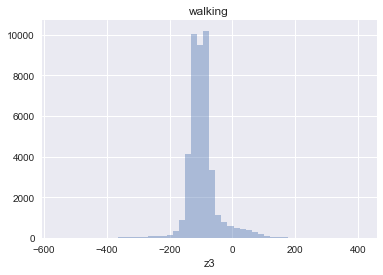

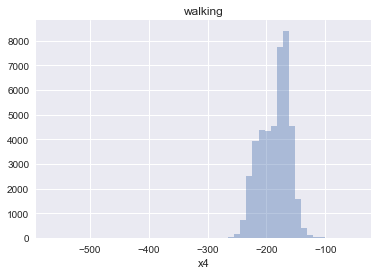

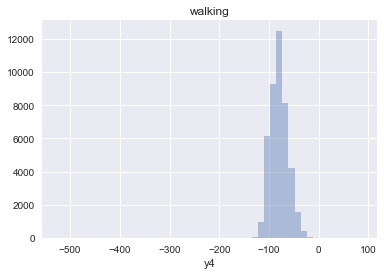

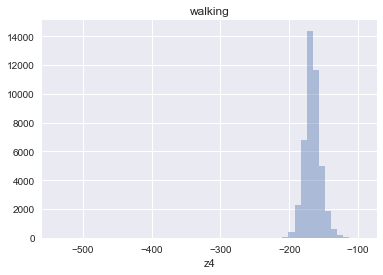

In [76]:
def distplot_classes(classes, eixos):
    for position in classes:
        for eixo in eixos:
            sns.distplot(wearable_data[wearable_data['class']==position][eixo], kde=False)
            plt.title(position)
            plt.show()
distplot_classes(classes, axis)

In [111]:
from string import ascii_letters

def corr_matrix(data):
    sns.set(style="white")


    # Compute the correlation matrix
    corr = data.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [133]:
y_all = wearable_data['class'].to_frame()
X_all = wearable_data.drop(['user', 'class'], axis=1)

gender_nums = {"gender":{"Woman": 0, "Man": 1}}
X_all.replace(gender_nums, inplace=True)


class_nums = {"class":{'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4}}
y_all.replace(class_nums, inplace=True)

In [134]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler ().fit(X_all)
X_all_scaled = scaler.transform(X_all)
X_all_scaled = pd.DataFrame(X_all_scaled, columns=X_all.columns)
X_all_scaled.head(5)

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
0,0.0,0.382979,0.307692,0.714286,1.0,0.371779,0.451493,0.532544,0.487073,0.658867,0.809202,0.500994,0.596285,0.509286,0.801161,0.691176,0.789474
1,0.0,0.382979,0.307692,0.714286,1.0,0.371779,0.453980,0.531558,0.489142,0.658867,0.810555,0.482107,0.596285,0.511241,0.802612,0.689542,0.793522
2,0.0,0.382979,0.307692,0.714286,1.0,0.374233,0.457711,0.534517,0.498449,0.661330,0.814614,0.483101,0.596285,0.511241,0.799710,0.689542,0.795547
3,0.0,0.382979,0.307692,0.714286,1.0,0.373006,0.456468,0.538462,0.495346,0.662562,0.813261,0.483101,0.596285,0.512219,0.796807,0.691176,0.799595
4,0.0,0.382979,0.307692,0.714286,1.0,0.374233,0.456468,0.534517,0.497415,0.661330,0.814614,0.483101,0.596285,0.512219,0.796807,0.689542,0.797571


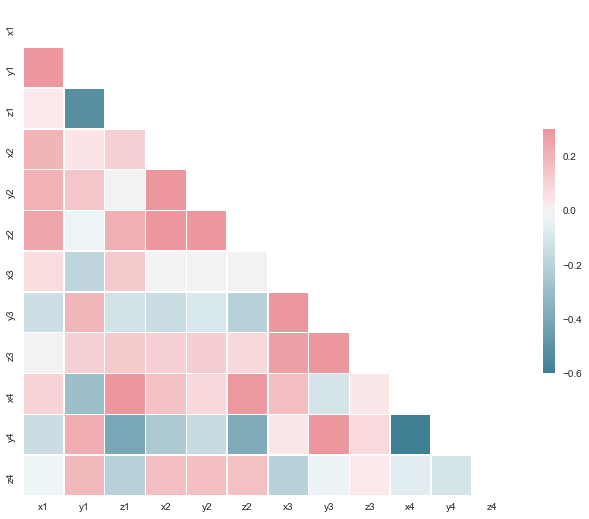

In [135]:
corr_matrix(X_all_scaled.drop(['gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index'], axis=1))

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
principalComponents = pca.fit_transform(X_all_scaled)
X_pca = pd.DataFrame(data=principalComponents, 
                    columns=['p1','p2','p3','p4','p5','p6'])

In [155]:
# Quebrando o dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.35, random_state=1973)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(class_weight='balanced',C=0.003)
lr.fit(X_train, y_train.values.ravel())
predict = lr.predict(X_test)
confusion_matrix(y_test, predict)

array([[16991,     0,     1,     4,   651],
       [ 1202,     1,  1847,     2,  1116],
       [    2,     0, 15822,     6,   820],
       [ 1309,    22,  1839,   204,   937],
       [  359,     0,  8185,     0,  6652]], dtype=int64)

In [148]:
from sklearn.metrics import roc_auc_score ,roc_curve,auc, f1_score, mean_squared_error, r2_score

In [165]:
f1_score(y_test, predict, average="macro")

0.9905374212035184

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
lr = RandomForestClassifier()
lr.fit(X_train, y_train.values.ravel())
predict = lr.predict(X_test)
confusion_matrix(y_test, predict)

array([[17644,     0,     0,     3,     0],
       [    2,  4105,    14,    32,    15],
       [    0,     2, 16591,    13,    44],
       [    4,    63,    42,  4186,    16],
       [    0,    17,    31,     7, 15141]], dtype=int64)

In [157]:
score = r2_score(y_test,predict)

In [158]:
score

0.99191884873447422

In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.values.ravel())
predictneigh = neigh.predict(X_test)
confusion_matrix(y_test, predictneigh)

array([[17636,     0,     0,    11,     0],
       [    1,  4133,    10,    22,     2],
       [    0,     2, 16620,    19,     9],
       [    6,    40,    37,  4223,     5],
       [    0,    39,   100,    18, 15039]], dtype=int64)

In [166]:
f1_score(y_test, predictneigh, average="macro")

0.99125433699616627